In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import folium

from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
chp = pd.read_csv("Data\housing.csv")
chp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
chp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
chp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:

categorical_columns = chp.select_dtypes(include=['object', 'category']).columns

dummies = pd.get_dummies(chp[categorical_columns]).astype(int)

data_without_categoricals = chp.drop(categorical_columns, axis=1)

# Combinar o DataFrame sem categóricas com os dummies
data = pd.concat([data_without_categoricals, dummies], axis=1)

# Salvar o DataFrame resultante em um arquivo CSV
output_file = "processed_data.csv"
data.to_csv(output_file, index=False)

print(f"Arquivo salvo como {output_file}")


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

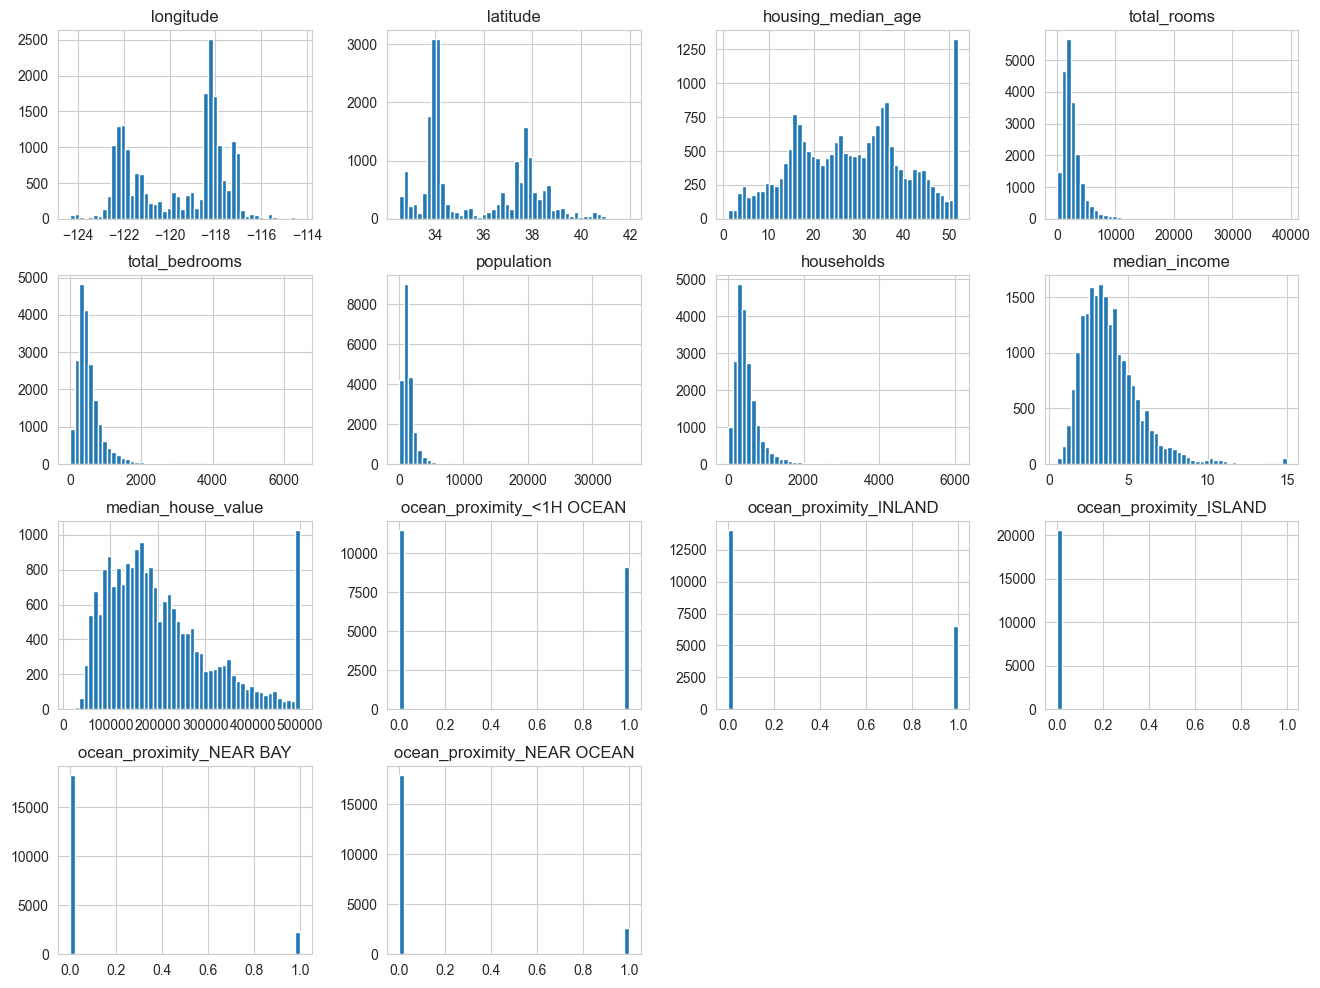

In [9]:
data.hist(figsize = (16,12), bins=50)

In [10]:
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

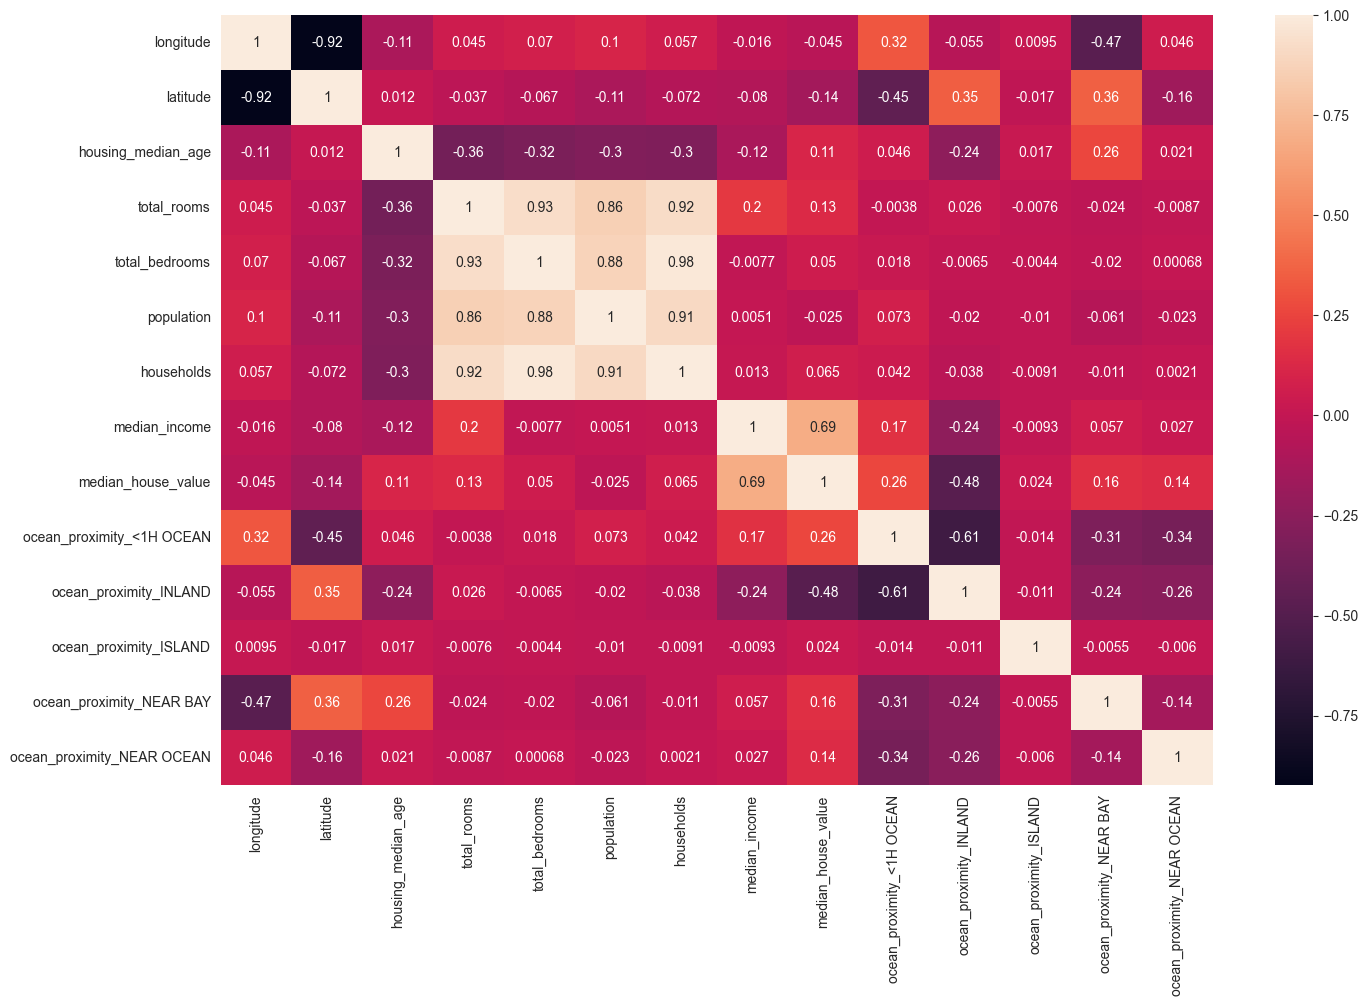

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot = True)

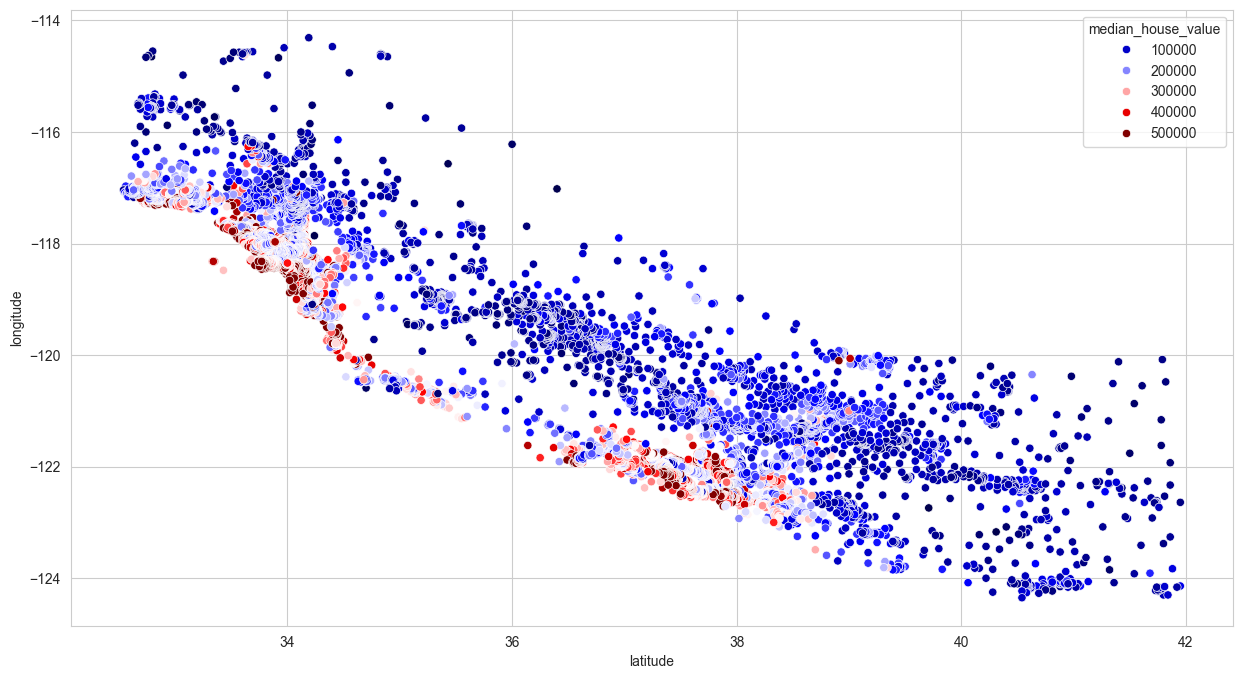

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="seismic")
plt.show()

In [13]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Saída com uma única unidade para regressão

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=25, validation_split=0.2, verbose=1)

# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plotar o histórico de treino
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss (Treino)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.show()

Epoch 1/1000


C:\Users\luizo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 54778044416.0000 - mean_absolute_error: 204927.6562 - val_loss: 42809323520.0000 - val_mean_absolute_error: 176841.9062
Epoch 2/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 29589340160.0000 - mean_absolute_error: 139249.6875 - val_loss: 10032800768.0000 - val_mean_absolute_error: 73792.3047
Epoch 3/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 8830143488.0000 - mean_absolute_error: 69257.9609 - val_loss: 8145952256.0000 - val_mean_absolute_error: 65365.6133
Epoch 4/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 7438832128.0000 - mean_absolute_error: 62665.8750 - val_loss: 7157531136.0000 - val_mean_absolute_error: 60351.7812
Epoch 5/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 6594403840.0000 - mean_absolute_error: 58156.6133 - val_loss: 6469154816.0000 - val_mean_absolute_error: 56833.9297
Epoch 6/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 5959333376.0000 - mean_absolute_error: 55081

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
Valores reais: [245800. 137900. 218200. 220800. 170500.  75000. 269400. 228900. 500001.
  80800.]
Valores preditos: [173861.64  136026.25  205027.31  122377.89  172155.52   83292.19
 274144.6   216857.92  477241.34   66605.195]


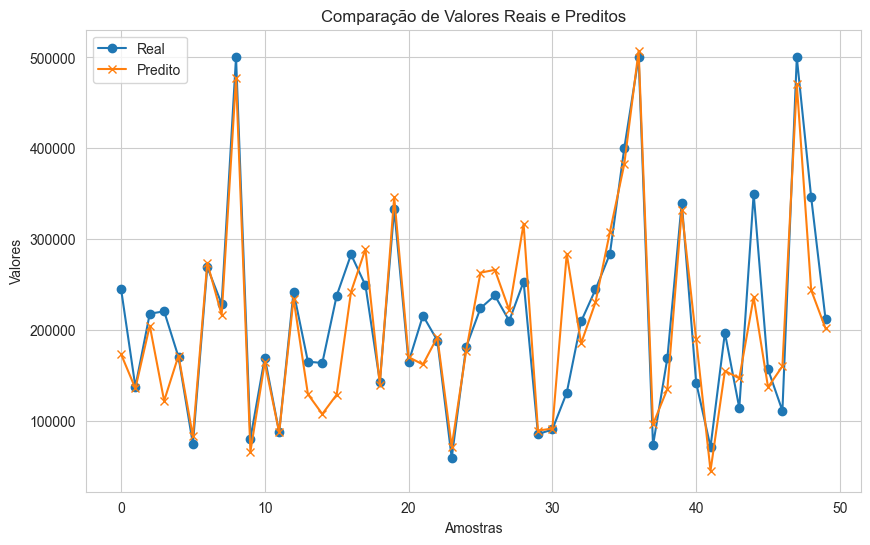

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Converter y_test para um array numpy para usar flatten()
y_test_values = y_test.values

# Mostrar os valores reais e preditos (exibindo os primeiros 10 valores como exemplo)
print("Valores reais:", y_test_values[:10].flatten())
print("Valores preditos:", y_pred[:10].flatten())

# Visualizar a comparação entre valores reais e preditos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_values[:50], label='Real', marker='o')  # Mostra os primeiros 50 valores reais
plt.plot(y_pred[:50], label='Predito', marker='x')  # Mostra os primeiros 50 valores preditos
plt.title('Comparação de Valores Reais e Preditos')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\luizo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 55798202368.0000 - mean_absolute_error: 206154.2812 - val_loss: 53635547136.0000 - val_mean_absolute_error: 201044.9219
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 48248483840.0000 - mean_absolute_error: 187785.3750 - val_loss: 24047902720.0000 - val_mean_absolute_error: 119622.7734
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 16316993536.0000 - mean_absolute_error: 93186.5000 - val_loss: 7346591744.0000 - val_mean_absolute_error: 62615.2891
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 7156123136.0000 - mean_absolute_error: 62156.6602 - val_loss: 7173507072.0000 - val_mean_absolute_error: 63152.2109
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 7090260480.0000 - mean_absolute_error: 62882.1602 - val_loss: 7142539776.0000 - val_mean_absolute_error: 62894.5234
Epoch 6/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 7095970304.0000 - mean_absolute_error: 62812.

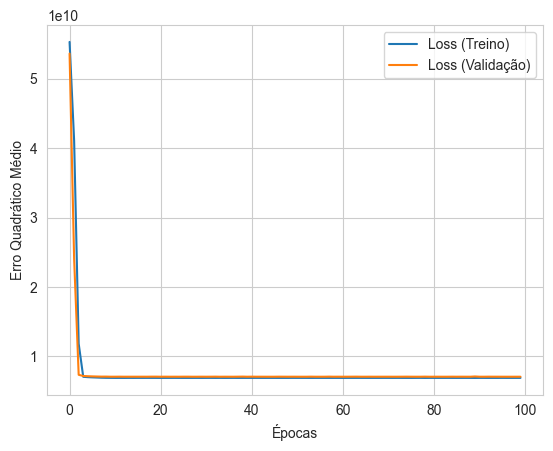

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
Valores reais: [245800. 137900. 218200. 220800. 170500.  75000. 269400. 228900. 500001.
  80800.]
Valores preditos: [176741.17 231659.66 178422.52 164445.33 215415.48 128438.38 263924.72
 248662.33 363796.03 132125.45]


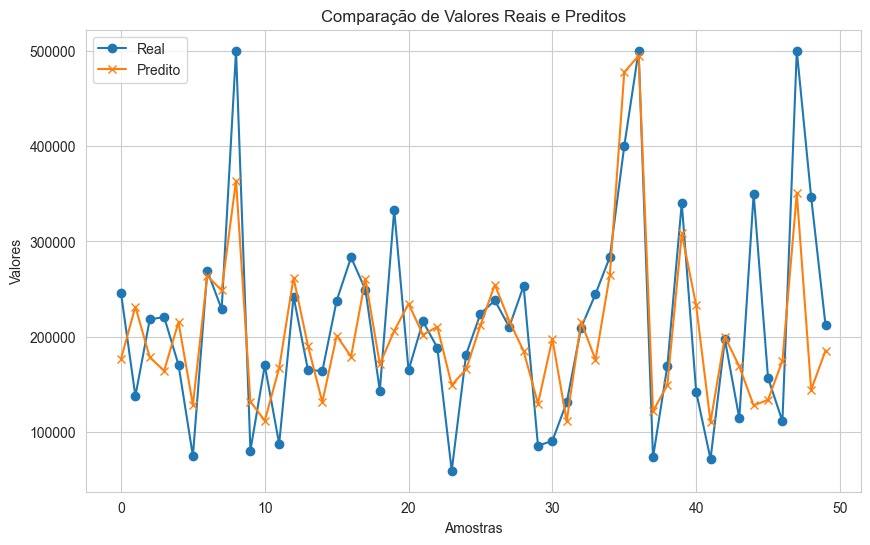

In [ ]:
# Selecionando a variável 'median_income' como preditora (X) e 'median_house_value' como alvo (y)
X = data[['median_income']]  # Apenas a coluna 'median_income'
y = data['median_house_value']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Saída com uma única unidade para regressão

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plotar o histórico de treino
plt.plot(history.history['loss'], label='Loss (Treino)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.show()

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Converter y_test para um array numpy para usar flatten()
y_test_values = y_test.values

# Mostrar os valores reais e preditos (exibindo os primeiros 10 valores como exemplo)
print("Valores reais:", y_test_values[:10].flatten())
print("Valores preditos:", y_pred[:10].flatten())

# Visualizar a comparação entre valores reais e preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test_values[:50], label='Real', marker='o')  # Mostra os primeiros 50 valores reais
plt.plot(y_pred[:50], label='Predito', marker='x')  # Mostra os primeiros 50 valores preditos
plt.title('Comparação de Valores Reais e Preditos')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

# Salvar o modelo treinado
model.save('modelo_mlp_median_income.h5')  # O modelo é salvo como 'modelo_mlp_median_income.h5'



In [ ]:
model = load_model('modelo_mlp_median_income.h5')

def prever_valor_usuario():
    # Receber a entrada do usuário para 'median_income'
    median_income_usuario = float(input("Digite o valor de 'median_income' (renda média): "))
    
    # Normalizar o valor da entrada do usuário
    usuario_normalizado = scaler.transform([[median_income_usuario]])
    
    # Fazer a previsão com o modelo carregado
    valor_predito = model.predict(usuario_normalizado)
    
    print(f"O valor predito da casa para uma 'median_income' de {median_income_usuario} é: {valor_predito[0][0]:,.2f}")
    
# Chamar a função para prever o valor com base na entrada do usuário
prever_valor_usuario()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
O valor predito da casa para uma 'median_income' de 50000.0 é: 2,444,477,184.00


C:\Users\luizo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
